(test-functions:piston)=
# Piston Simulation Function

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import uqtestfuns as uqtf

The Piston simulation test function is a seven-dimensional scalar-valued 
function.
The function computes the cycle time of a piston system.

This function has been used as a test function in metamodeling exercises {cite}`BenAri2007`.
A 20-dimensional variant was used in the context of sensitivity analysis {cite}`Moon2010`
by introducing 13 additional _inert_ input variables.

## Test function instance

To create a default instance of the piston simulation test function:

In [2]:
my_testfun = uqtf.Piston()

Check if it has been correctly instantiated:

In [3]:
print(my_testfun)

Name              : Piston
Spatial dimension : 7
Description       : Piston simulation model from Ben-Ari and Steinberg (2007)


## Description

The Piston simulation computes the cycle time of a piston moving
inside a cylinder using the following analytical expression:

$$
\begin{align}
  \mathcal{M}(\boldsymbol{x}) & = 2 \pi \left( \frac{M}{k + S^2 \frac{P_0 V_0}{T_0} \frac{T_a}{V^2}} \right)^{0.5}, \\
  V & = \frac{S}{2 k} \left[ \left(A^2 + 4 k \frac{P_0 V_0}{T_0} T_a \right)^{0.5} - A \right]^{0.5}, \\
  A & = P_0 S + 19.62 M - \frac{k V_0}{S},
\end{align}
$$
where $\boldsymbol{x} = \{ M, S, V_0, k, P_0, T_a, T_0 \}$
is the seven-dimensional vector of input variables further defined below.

## Probabilistic input

Two probabilistic input model specifications for the OTL circuit function are
available as shown in the table below.

|  No.   |         Keyword         |       Source       |
|:------:|:-----------------------:|:------------------:|
|   1.   | `BenAri2007` (default)  | {cite}`BenAri2007` |
|   2.   |       `Moon2010`        |  {cite}`Moon2010`  |

The default selection, based on {cite}`BenAri2007`,
contains seven input variables given as independent uniform random variables
with specified ranges shown in the table below.

In [4]:
my_testfun.prob_input

ProbInput(spatial_dimension=7, marginals=(UnivDist(distribution='uniform', parameters=array([30., 60.]), name='M', description='Piston weight [kg]'), UnivDist(distribution='uniform', parameters=array([0.005, 0.02 ]), name='S', description='Piston surface area [m^2]'), UnivDist(distribution='uniform', parameters=array([0.002, 0.01 ]), name='V0', description='Initial gas volume [m^3]'), UnivDist(distribution='uniform', parameters=array([1000., 5000.]), name='k', description='Spring coefficient [N/m]'), UnivDist(distribution='uniform', parameters=array([ 90000., 110000.]), name='P0', description='Atmospheric pressure [N/m^2]'), UnivDist(distribution='uniform', parameters=array([290., 296.]), name='Ta', description='Ambient temperature [K]'), UnivDist(distribution='uniform', parameters=array([340., 360.]), name='T0', description='Filling gas temperature [K]')), copulas=None, name='Piston-BenAri2007', description='Probabilistic input model for the Piston simulation model from Ben-Ari and Steinberg (2007).')

````{note}
In {cite}`Moon2010`,
13 additional _inert_ independent input variables are introduced (totaling 20
input variables);
these input variables, being inert, do not affect the output of the function.

To create an instance of the piston simulation test function
with the probabilistic input specified in {cite}`Moon2010`,
pass the corresponding keyword (`"Moon2010"`)
to the parameter (`prob_input_selection`):

```python
my_testfun = uqtf.Piston(prob_input_selection="Moon2010")
```
````

## Reference results

This section provides several reference results of typical UQ analyses involving
the test function.

### Sample histogram

Shown below is the histogram of the output based on $100'000$ random points:

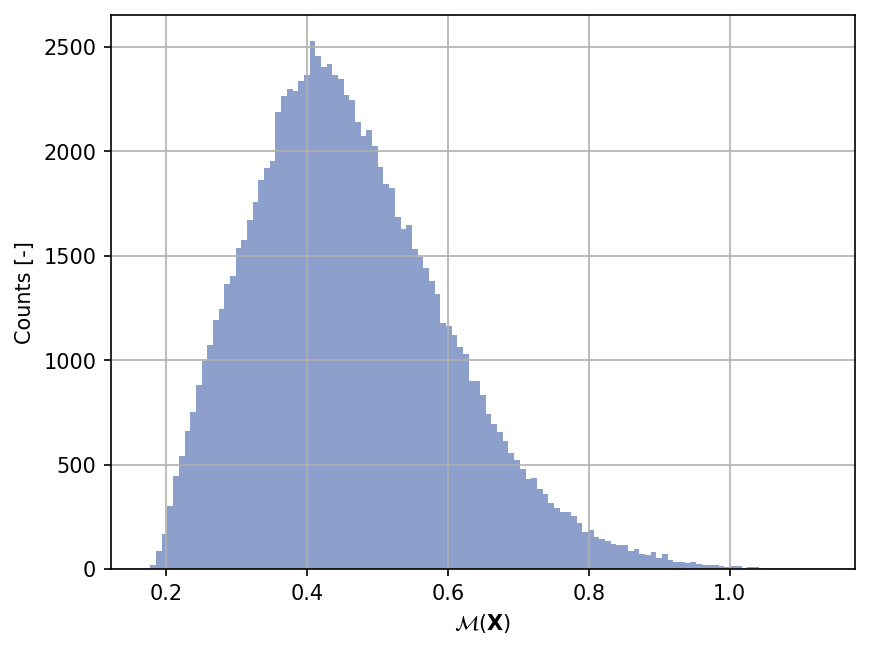

In [5]:
np.random.seed(42)
xx_test = my_testfun.prob_input.get_sample(100000)
yy_test = my_testfun(xx_test)

plt.hist(yy_test, bins="auto", color="#8da0cb");
plt.grid();
plt.ylabel("Counts [-]");
plt.xlabel("$\mathcal{M}(\mathbf{X})$");
plt.gcf().set_dpi(150);

### Moments estimation

Shown below is the convergence of a direct Monte-Carlo estimation of
the output mean and variance with increasing sample sizes.

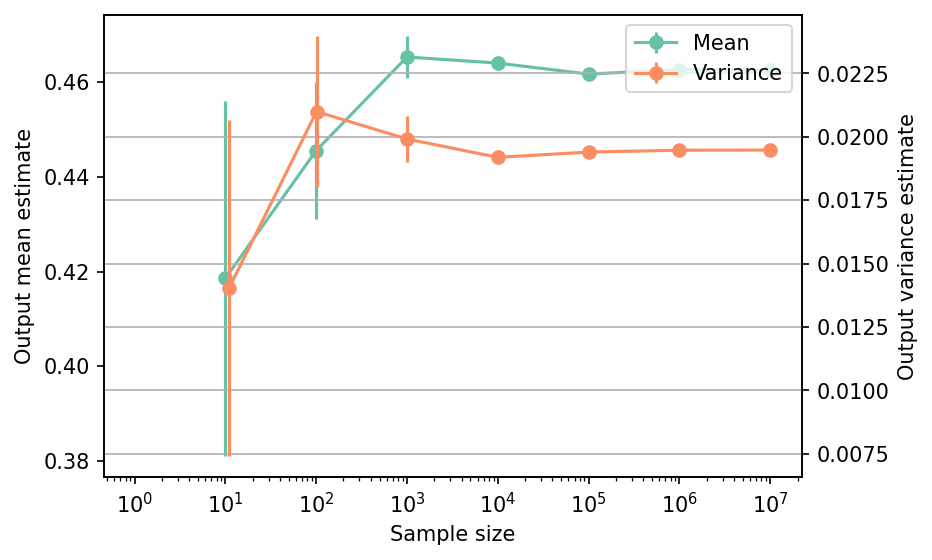

In [6]:
# --- Compute the mean and variance estimate
np.random.seed(42)
sample_sizes = np.array([1e1, 1e2, 1e3, 1e4, 1e5, 1e6, 1e7], dtype=int)
mean_estimates = np.empty(len(sample_sizes))
var_estimates = np.empty(len(sample_sizes))

for i, sample_size in enumerate(sample_sizes):
    xx_test = my_testfun.prob_input.get_sample(sample_size)
    yy_test = my_testfun(xx_test)
    mean_estimates[i] = np.mean(yy_test)
    var_estimates[i] = np.var(yy_test)

# --- Compute the error associated with the estimates
mean_estimates_errors = np.sqrt(var_estimates) / np.sqrt(np.array(sample_sizes))
var_estimates_errors = var_estimates * np.sqrt(2 / (np.array(sample_sizes) - 1))

# --- Do the plot
fig, ax_1 = plt.subplots(figsize=(6,4))

ax_1.errorbar(
    sample_sizes,
    mean_estimates,
    yerr=mean_estimates_errors,
    marker="o",
    color="#66c2a5",
    label="Mean",
)
ax_1.set_xlabel("Sample size")
ax_1.set_ylabel("Output mean estimate")
ax_1.set_xscale("log");
ax_2 = ax_1.twinx()
ax_2.errorbar(
    sample_sizes + 1,
    var_estimates,
    yerr=var_estimates_errors,
    marker="o",
    color="#fc8d62",
    label="Variance",
)
ax_2.set_ylabel("Output variance estimate")

# Add the two plots together to have a common legend
ln_1, labels_1 = ax_1.get_legend_handles_labels()
ln_2, labels_2 = ax_2.get_legend_handles_labels()
ax_2.legend(ln_1 + ln_2, labels_1 + labels_2, loc=0)

plt.grid()
fig.set_dpi(150)

The tabulated results for each sample size is shown below.

In [7]:
from tabulate import tabulate

# --- Compile data row-wise
outputs = []
for (
    sample_size,
    mean_estimate,
    mean_estimate_error,
    var_estimate,
    var_estimate_error,
) in zip(
    sample_sizes,
    mean_estimates,
    mean_estimates_errors,
    var_estimates,
    var_estimates_errors,
):
    outputs += [
        [
            sample_size,
            mean_estimate,
            mean_estimate_error,
            var_estimate,
            var_estimate_error,
            "Monte-Carlo",
        ],
    ]

header_names = [
    "Sample size",
    "Mean",
    "Mean error",
    "Variance",
    "Variance error",
    "Remark",
]

tabulate(
    outputs,
    headers=header_names,
    floatfmt=(".1e", ".4e", ".4e", ".4e", ".4e", "s"),
    tablefmt="html",
    stralign="center",
    numalign="center",
)

'<table>\n<thead>\n<tr><th style="text-align: center;"> Sample size </th><th style="text-align: center;">   Mean   </th><th style="text-align: center;"> Mean error </th><th style="text-align: center;"> Variance </th><th style="text-align: center;"> Variance error </th><th style="text-align: center;">  Remark   </th></tr>\n</thead>\n<tbody>\n<tr><td style="text-align: center;">   1.0e+01   </td><td style="text-align: center;">4.1856e-01</td><td style="text-align: center;"> 3.7467e-02 </td><td style="text-align: center;">1.4038e-02</td><td style="text-align: center;">   6.6174e-03   </td><td style="text-align: center;">Monte-Carlo</td></tr>\n<tr><td style="text-align: center;">   1.0e+02   </td><td style="text-align: center;">4.4553e-01</td><td style="text-align: center;"> 1.4489e-02 </td><td style="text-align: center;">2.0994e-02</td><td style="text-align: center;">   2.9840e-03   </td><td style="text-align: center;">Monte-Carlo</td></tr>\n<tr><td style="text-align: center;">   1.0e+03   </td><td style="text-align: center;">4.6529e-01</td><td style="text-align: center;"> 4.4625e-03 </td><td style="text-align: center;">1.9914e-02</td><td style="text-align: center;">   8.9102e-04   </td><td style="text-align: center;">Monte-Carlo</td></tr>\n<tr><td style="text-align: center;">   1.0e+04   </td><td style="text-align: center;">4.6402e-01</td><td style="text-align: center;"> 1.3853e-03 </td><td style="text-align: center;">1.9191e-02</td><td style="text-align: center;">   2.7141e-04   </td><td style="text-align: center;">Monte-Carlo</td></tr>\n<tr><td style="text-align: center;">   1.0e+05   </td><td style="text-align: center;">4.6169e-01</td><td style="text-align: center;"> 4.4044e-04 </td><td style="text-align: center;">1.9398e-02</td><td style="text-align: center;">   8.6753e-05   </td><td style="text-align: center;">Monte-Carlo</td></tr>\n<tr><td style="text-align: center;">   1.0e+06   </td><td style="text-align: center;">4.6265e-01</td><td style="text-align: center;"> 1.3954e-04 </td><td style="text-align: center;">1.9471e-02</td><td style="text-align: center;">   2.7536e-05   </td><td style="text-align: center;">Monte-Carlo</td></tr>\n<tr><td style="text-align: center;">   1.0e+07   </td><td style="text-align: center;">4.6257e-01</td><td style="text-align: center;"> 4.4132e-05 </td><td style="text-align: center;">1.9476e-02</td><td style="text-align: center;">   8.7100e-06   </td><td style="text-align: center;">Monte-Carlo</td></tr>\n</tbody>\n</table>'

## References

```{bibliography}
:style: unsrtalpha
:filter: docname in docnames
```